#### Trivago Data Exploration

##### assessment

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [6]:
df=pd.read_csv("session_data.csv")

In [8]:
data=df.copy()

In [9]:
#work on the data copy
data=df.copy()

In [10]:
data.shape

(900000, 16)

In [11]:
data.columns

Index(['ymd', 'session_id', 'tracking_id', 'platform', 'is_app', 'is_repeater',
       'traffic_type', 'country_name', 'agent_id', 'clickouts', 'bookings',
       'session_duration', 'entry_page', 'total_ctp', 'arrival_day',
       'departure_day'],
      dtype='object')

In [12]:
data.describe()

,ymd,session_id,is_app,is_repeater,traffic_type,agent_id,clickouts,bookings,entry_page,total_ctp
count,9.000000e+05,9.000000e+05,900000.0,900000.000000,900000.000000,900000.000000,900000.000000,900000.000000,900000.000000,900000.000000
mean,2.018036e+07,2.018036e+18,0.0,0.391088,4.982533,15.087582,0.836068,0.010381,2126.121292,6.597208
std,5.068007e+01,5.067845e+12,0.0,0.487994,2.395181,7.559502,1.826044,0.110524,65.908910,30.528072
min,2.018030e+07,2.018030e+18,0.0,0.000000,2.000000,2.000000,0.000000,0.000000,2100.000000,0.000000
25%,2.018032e+07,2.018032e+18,0.0,0.000000,2.000000,12.000000,0.000000,0.000000,2111.000000,0.000000
50%,2.018033e+07,2.018033e+18,0.0,0.000000,6.000000,18.000000,0.000000,0.000000,2113.000000,0.000000
75%,2.018042e+07,2.018042e+18,0.0,1.000000,6.000000,20.000000,1.000000,0.000000,2116.000000,1.000000
max,2.018043e+07,2.018043e+18,0.0,1.000000,10.000000,28.000000,154.000000,8.000000,2502.000000,2958.000000


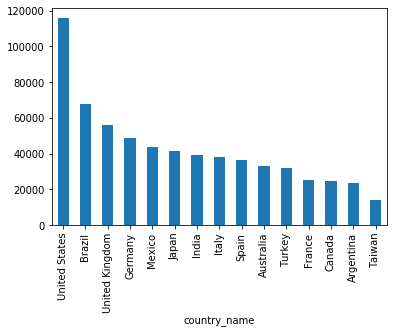

In [13]:

# show top 15 country
data.country_name.groupby(data.country_name).count().sort_values(ascending=False).head(15).plot(kind='bar')


plt.show()

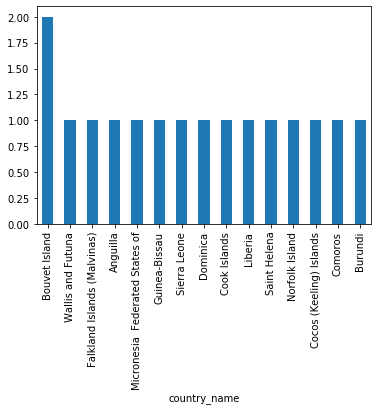

In [14]:
# show least 15 country
data.country_name.groupby(data.country_name).count().sort_values(ascending=False).tail(15).plot(kind='bar')


#### quality issue 

1. ymd is not a valid date format  
* current format yyyymmdd 
* new format yyyy-mm-dd

In [15]:
# solution
data.ymd=pd.to_datetime(data['ymd'], format='%Y%m%d')

#test
data.ymd

0        2018-03-17
1        2018-04-21
2        2018-04-19
3        2018-04-29
4        2018-04-05
            ...    
899995   2018-03-03
899996   2018-04-28
899997   2018-04-13
899998   2018-04-18
899999   2018-03-28
Name: ymd, Length: 900000, dtype: datetime64[ns]

In [16]:
data

,ymd,session_id,tracking_id,platform,is_app,is_repeater,traffic_type,country_name,agent_id,clickouts,bookings,session_duration,entry_page,total_ctp,arrival_day,departure_day
0,2018-03-17,2018031709007001454,8TQMP2ZFW3,IN,0,0,2,India,20,1,0,691,2100,2,20180318,20180319
1,2018-04-21,2018042115070025908,VR61OF5K1B,DE,0,1,2,Germany,20,0,0,134,2100,0,\N,\N
2,2018-04-19,2018041906042028472,1M38SITXM0,TR,0,0,2,Turkey,20,0,0,189,2100,31,\N,\N
3,2018-04-29,2018042913038063890,7J2MNK45NU,DE,0,0,10,Mexico,20,0,0,83,2116,0,\N,\N
4,2018-04-05,2018040511098032520,4VB4NF25TK,UK,0,0,2,United Kingdom,20,1,0,2407,2100,80,20180825,20180830
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
899995,2018-03-03,2018030318954011164,YGG0J168V4,CA,0,1,8,Canada,16,0,0,13,2116,0,\N,\N
899996,2018-04-28,2018042823310017549,AM6OG6HQTN,AU,0,0,8,Australia,20,0,0,42,2113,0,\N,\N
899997,2018-04-13,2018041320055037366,WPZZZU0EP6,BE,0,1,8,Belgium,20,1,0,151,2116,37,20180618,20180619
899998,2018-04-18,2018041808332011694,SO4QPH2UI9,AU,0,0,8,Australia,20,0,0,15,2113,0,\N,\N


In [17]:
data['session_id'].dtype

dtype('int64')

In [18]:
data['session_id']=data.session_id.map(str)

In [45]:
#take the date until minutes and sec.
#now the format is yyyymmddHHMMSS
data['date']=data['session_id'].str[:10] 
## for sec. [10:12]
## for hour [8:10]
## 2018-03-28-02:927012146

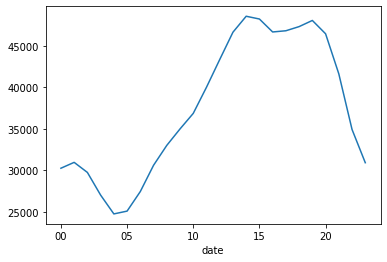

In [34]:
## checking minutes ( it should be <=60)
## for most cases it yes, but some values are not. 
data.date.groupby(data.date).count().plot()

# solution will take minutes out ! 

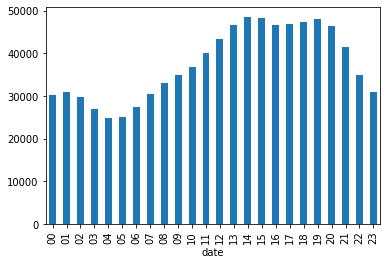

In [44]:
## checking minutes ( it should be <=24)
## for most cases it yes, but some values are not. 
data.date.groupby(data.date).count().plot(kind='bar')

# result: keep only the hours ! 

In [46]:
#extract hour of session from session id

data.date=pd.to_datetime(data['date'],format='%Y%m%d%H')
data.date

0        2018-03-17 09:00:00
1        2018-04-21 15:00:00
2        2018-04-19 06:00:00
3        2018-04-29 13:00:00
4        2018-04-05 11:00:00
                 ...        
899995   2018-03-03 18:00:00
899996   2018-04-28 23:00:00
899997   2018-04-13 20:00:00
899998   2018-04-18 08:00:00
899999   2018-03-28 02:00:00
Name: date, Length: 900000, dtype: datetime64[ns]

In [47]:
data[['ymd','date']]

,ymd,date
0,2018-03-17,2018-03-17 09:00:00
1,2018-04-21,2018-04-21 15:00:00
2,2018-04-19,2018-04-19 06:00:00
3,2018-04-29,2018-04-29 13:00:00
4,2018-04-05,2018-04-05 11:00:00
...,...,...
899995,2018-03-03,2018-03-03 18:00:00
899996,2018-04-28,2018-04-28 23:00:00
899997,2018-04-13,2018-04-13 20:00:00
899998,2018-04-18,2018-04-18 08:00:00


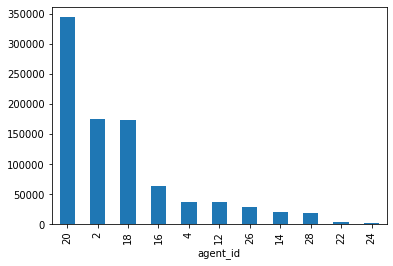

In [48]:
#top agents !

data.agent_id.groupby(data.agent_id).count().sort_values(ascending=False).plot(kind='bar')

In [49]:
# replace "\N" with "NaN" for data analysis 
data.departure_day.replace("\\N",np.NaN,inplace=True)
data.arrival_day.replace("\\N", np.NaN,inplace=True)

In [50]:
data.arrival_day=pd.to_datetime(data['arrival_day'],format='%Y%m%d')
data.departure_day=pd.to_datetime(data['departure_day'],format='%Y%m%d')

In [51]:
data.departure_day

0        2018-03-19
1               NaT
2               NaT
3               NaT
4        2018-08-30
            ...    
899995          NaT
899996          NaT
899997   2018-06-19
899998          NaT
899999          NaT
Name: departure_day, Length: 900000, dtype: datetime64[ns]

In [52]:
# number of nights stayed ! 

data['nights']=data.departure_day- data.arrival_day
#20180319-20180318

In [53]:
data.nights.groupby(data.nights).count()#.plot()

nights
0 days          11
1 days      184286
2 days       52074
3 days       34475
4 days       21321
             ...  
88 days          2
89 days          4
90 days          3
91 days          7
122 days         1
Name: nights, Length: 87, dtype: int64

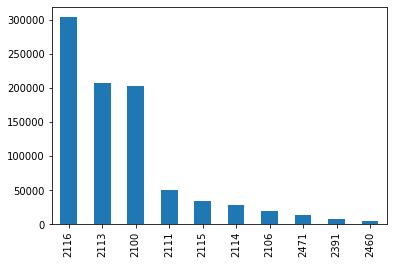

In [54]:
## main entry page

data.entry_page.value_counts().head(10).plot(kind='bar')

In [55]:
## data quality issue , customers who made bookings but no nights 'n=163 '

data[['bookings','nights']][data['bookings']!=0][data['nights'].isnull()]

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until


,bookings,nights
5256,1,NaT
12848,1,NaT
21517,1,NaT
28636,1,NaT
32265,1,NaT
...,...,...
721981,1,NaT
791211,1,NaT
838708,1,NaT
869209,1,NaT


In [56]:
# quality issue, accounts spent nights but no booking on the website [n=336035]

data[['bookings','nights']][data['bookings']==0][data['nights'].notnull()]

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until


,bookings,nights
0,0,1 days
4,0,5 days
7,0,1 days
9,0,4 days
10,0,1 days
...,...,...
899983,0,1 days
899984,0,1 days
899991,0,1 days
899992,0,1 days


In [60]:
data.is_app.groupby(data.is_app).count()

is_app
0    900000
Name: is_app, dtype: int64

In [62]:
data.is_repeater.groupby(data.is_repeater).count()

is_repeater
0    548021
1    351979
Name: is_repeater, dtype: int64

In [64]:
data.traffic_type.groupby(data.traffic_type).count()

traffic_type
2     292431
4     100000
6     294068
8     200000
10     13501
Name: traffic_type, dtype: int64

In [65]:
data.clickouts.groupby(data.clickouts).count()

clickouts
0      555424
1      190204
2       71215
3       33273
4       17901
        ...  
86          1
97          1
113         1
131         1
154         1
Name: clickouts, Length: 71, dtype: int64

In [63]:
data

,ymd,session_id,tracking_id,platform,is_app,is_repeater,traffic_type,country_name,agent_id,clickouts,bookings,session_duration,entry_page,total_ctp,arrival_day,departure_day,date,nights
0,2018-03-17,2018031709007001454,8TQMP2ZFW3,IN,0,0,2,India,20,1,0,691,2100,2,2018-03-18,2018-03-19,2018-03-17 09:00:00,1 days
1,2018-04-21,2018042115070025908,VR61OF5K1B,DE,0,1,2,Germany,20,0,0,134,2100,0,NaT,NaT,2018-04-21 15:00:00,NaT
2,2018-04-19,2018041906042028472,1M38SITXM0,TR,0,0,2,Turkey,20,0,0,189,2100,31,NaT,NaT,2018-04-19 06:00:00,NaT
3,2018-04-29,2018042913038063890,7J2MNK45NU,DE,0,0,10,Mexico,20,0,0,83,2116,0,NaT,NaT,2018-04-29 13:00:00,NaT
4,2018-04-05,2018040511098032520,4VB4NF25TK,UK,0,0,2,United Kingdom,20,1,0,2407,2100,80,2018-08-25,2018-08-30,2018-04-05 11:00:00,5 days
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
899995,2018-03-03,2018030318954011164,YGG0J168V4,CA,0,1,8,Canada,16,0,0,13,2116,0,NaT,NaT,2018-03-03 18:00:00,NaT
899996,2018-04-28,2018042823310017549,AM6OG6HQTN,AU,0,0,8,Australia,20,0,0,42,2113,0,NaT,NaT,2018-04-28 23:00:00,NaT
899997,2018-04-13,2018041320055037366,WPZZZU0EP6,BE,0,1,8,Belgium,20,1,0,151,2116,37,2018-06-18,2018-06-19,2018-04-13 20:00:00,1 days
899998,2018-04-18,2018041808332011694,SO4QPH2UI9,AU,0,0,8,Australia,20,0,0,15,2113,0,NaT,NaT,2018-04-18 08:00:00,NaT
